# Scrapbook

In this notebook we investigate how to build a working pipeline.

It needs the following elements:

* Scrap the GitHub page of the provided username
* Select the relevant UI elements
* Compute the color distribution
* Create a blank image
* Randomly create a GitHub looking logo based on the distribution
* Save picture if satisfied

## Imports

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

## Scrap the GitHub page of the provided username

In [2]:
username = "inzouzouwetrust"
username = "agramfort"

In [3]:
def get_user_data(username):
    url = f"https://github.com/{username}"
    request = requests.get(url)
    if request.status_code != 200:
        raise ValueError(f"Invalid user name: {username}")
    data = request.text
    return data

In [4]:
data = get_user_data(username)

## Select the relevant HTML elements

In [5]:
def get_fill_values(data):
    soup = BeautifulSoup(data, features="lxml")
    days = soup.find_all("rect")
    fill_values = [d["fill"] for d in days]
    return fill_values

In [6]:
values = get_fill_values(data)

## Compute the color distribution

In [8]:
colors, counts = np.unique(values, return_counts=True)

In [9]:
colors, counts

(array(['#196127', '#239a3b', '#7bc96f', '#c6e48b', '#ebedf0'], dtype='<U7'),
 array([  8,  12,  48, 239,  64]))

In [10]:
COLORS_STR_2_RGB = {'#196127': [25, 97, 39],
          '#239a3b': [35, 154, 59],
          '#7bc96f': [123, 201, 111],
          '#c6e48b': [198, 228, 139],
          '#ebedf0': [235, 237, 240]}

assert set(COLORS_STR_2_RGB.keys()) == set(colors)

## Create the logo image

In [11]:
def create_logo(margin=20, block=50):
    """
    Create random GitHub logo
    """
    side = 2 * margin + 5 * block
    
    img = np.zeros((side, side, 3), dtype='uint8')
    # Fill image with light gray
    img[:, :] = COLORS_STR_2_RGB['#ebedf0']
    # Draw colors based on contributions distribution
    choices = np.random.choice(colors, size=15, replace=True, p=counts / sum(counts))
    # Populate empty image
    counter = 0
    try:
        for i in range(margin, side - block, block):
            for j in range(margin, side - block, block):
                img[j:j+block,i:i+block] = COLORS_STR_2_RGB[choices[counter]]
                counter += 1
    except:
        pass
    
    # Induce symmetry
    img[:,side//2:] = img[:,:side//2][:,::-1]
    
    return img

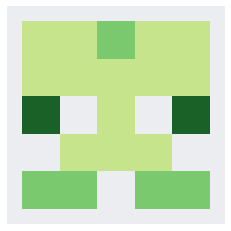

In [12]:
img = create_logo()
plt.imshow(img)
plt.axis("off");